In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [31]:
tracks = pd.read_csv('tracks.csv')
tracks.drop_duplicates(subset='track_id', inplace=True)

tracks


,track,artist,tags,arousal,dominance,track_id,genre,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,'Till I Collapse,Eminem,['aggressive'],5.273125,5.690625,4xkOaSrkexMciUUogZKVTS,rap,0.06220,0.548,0.847,0.000000,1,0.0816,-3.237,1,0.1860,171.447,4,0.1000
1,St. Anger,Metallica,['aggressive'],5.833000,5.427250,3fOc9x06lKJBhz435mInlH,metal,0.00131,0.249,0.949,0.022800,2,0.0953,-2.642,0,0.0678,185.252,4,0.4980
2,Speedin',Rick Ross,['aggressive'],5.870000,5.490000,3Y96xd4Ce0J47dcalLrEC8,rap,0.10900,0.668,0.787,0.000000,1,0.2100,-4.226,1,0.0429,100.059,4,0.4780
3,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",5.537214,5.691357,6tqFC1DIOphJkCwrjVzPmg,hip-hop,0.04930,0.805,0.918,0.000000,9,0.0691,-4.554,1,0.2120,125.984,4,0.7130
4,Die MF Die,Dope,['aggressive'],5.348235,5.441765,5bU4KX47KqtDKKaLM4QCzh,metal,0.00169,0.657,0.960,0.000997,5,0.1090,-3.524,0,0.0700,126.020,4,0.5670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61585,Secret,Quietdrive,['transparent'],3.450000,5.330000,2bRIsZ92JRKlvQOZlyR9CO,NaN,0.03340,0.396,0.915,0.000000,0,0.1350,-5.126,0,0.1560,167.996,4,0.0734
61586,The Last of the Rest Was the End,Medications,['transparent'],3.450000,5.330000,7o3Np7cho9cBCrNDokxzYC,NaN,0.00433,0.244,0.866,0.072200,2,0.0782,-5.774,0,0.0674,144.844,3,0.3400
61587,Lovechild,Daniel Lanois,['transparent'],4.405000,5.625000,4fVObxldDzxxRD6a5Eth9s,indie,0.90100,0.236,0.107,0.748000,10,0.1120,-20.091,0,0.0344,79.476,4,0.0720
61588,Last Inhale,Tapage,['transparent'],3.341667,4.466667,5WxwRwUQ4R4L46VEm3213y,ambient,0.07180,0.542,0.909,0.817000,2,0.1250,-8.977,0,0.1230,160.011,4,0.0552


In [32]:
#Find null values in the dataset
pd.isnull(tracks).sum()

track                  0
artist                 0
tags                   0
arousal                0
dominance              0
track_id               0
genre               2879
acousticness           0
danceability           0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo                  0
time_signature         0
valence                0
dtype: int64

In [33]:
#Percentage of missing values in Genre
MissingGenre = len(tracks[tracks["genre"].isnull()])/len(tracks)
print(f"{MissingGenre:.2%}")

4.76%


In [34]:
tracks.dropna(subset=['genre'], inplace=True)
tracks

,track,artist,tags,arousal,dominance,track_id,genre,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,'Till I Collapse,Eminem,['aggressive'],5.273125,5.690625,4xkOaSrkexMciUUogZKVTS,rap,0.06220,0.548,0.847,0.000000,1,0.0816,-3.237,1,0.1860,171.447,4,0.1000
1,St. Anger,Metallica,['aggressive'],5.833000,5.427250,3fOc9x06lKJBhz435mInlH,metal,0.00131,0.249,0.949,0.022800,2,0.0953,-2.642,0,0.0678,185.252,4,0.4980
2,Speedin',Rick Ross,['aggressive'],5.870000,5.490000,3Y96xd4Ce0J47dcalLrEC8,rap,0.10900,0.668,0.787,0.000000,1,0.2100,-4.226,1,0.0429,100.059,4,0.4780
3,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",5.537214,5.691357,6tqFC1DIOphJkCwrjVzPmg,hip-hop,0.04930,0.805,0.918,0.000000,9,0.0691,-4.554,1,0.2120,125.984,4,0.7130
4,Die MF Die,Dope,['aggressive'],5.348235,5.441765,5bU4KX47KqtDKKaLM4QCzh,metal,0.00169,0.657,0.960,0.000997,5,0.1090,-3.524,0,0.0700,126.020,4,0.5670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61582,Carmina Burana Fantasy,Sandy Bull,['transparent'],3.450000,5.330000,5Q4v842TD2TjTFHYBEZyks,guitar,0.88300,0.533,0.397,0.855000,2,0.0489,-12.494,1,0.0377,123.239,4,0.6020
61583,Pfane pt. 2,Bola,['transparent'],3.648000,4.638000,2wA8w3g0Q3IuAd2MPqKZso,idm,0.02930,0.641,0.481,0.273000,8,0.2950,-16.147,1,0.0409,80.006,4,0.3440
61587,Lovechild,Daniel Lanois,['transparent'],4.405000,5.625000,4fVObxldDzxxRD6a5Eth9s,indie,0.90100,0.236,0.107,0.748000,10,0.1120,-20.091,0,0.0344,79.476,4,0.0720
61588,Last Inhale,Tapage,['transparent'],3.341667,4.466667,5WxwRwUQ4R4L46VEm3213y,ambient,0.07180,0.542,0.909,0.817000,2,0.1250,-8.977,0,0.1230,160.011,4,0.0552


In [36]:
tracks.columns

Index(['track', 'artist', 'tags', 'arousal', 'dominance', 'track_id', 'genre',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [37]:
col_to_drop = ['key', 'mode']
tracks.drop(col_to_drop, axis=1, inplace=True)


In [38]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
arousal,57582.0,4.266888,1.160340,0.108113,3.479016,4.266235,5.113885,7.270
dominance,57582.0,5.266090,1.167565,0.229231,4.590000,5.490000,6.126780,7.440
acousticness,57582.0,0.332047,0.349291,0.000000,0.013800,0.176000,0.659000,0.996
danceability,57582.0,0.498110,0.178337,0.000000,0.374000,0.508000,0.627000,0.982
energy,57582.0,0.580531,0.267867,0.000020,0.373000,0.604000,0.813000,1.000
instrumentalness,57582.0,0.252434,0.354400,0.000000,0.000019,0.008660,0.579000,1.000
liveness,57582.0,0.197806,0.171585,0.000000,0.097400,0.124000,0.244000,0.999
loudness,57582.0,-9.964724,5.267763,-47.432000,-12.491750,-8.833000,-6.188000,5.118
speechiness,57582.0,0.070007,0.086696,0.000000,0.033200,0.041800,0.065000,0.966
tempo,57582.0,120.393402,29.771926,0.000000,97.640500,119.977000,139.393750,222.605


C:\Users\Esraa\AppData\Local\Temp/ipykernel_12980/3966088561.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = tracks.corr(method='pearson')


[Text(0.5, 0, 'arousal'),
 Text(1.5, 0, 'dominance'),
 Text(2.5, 0, 'acousticness'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'instrumentalness'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'loudness'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'valence')]

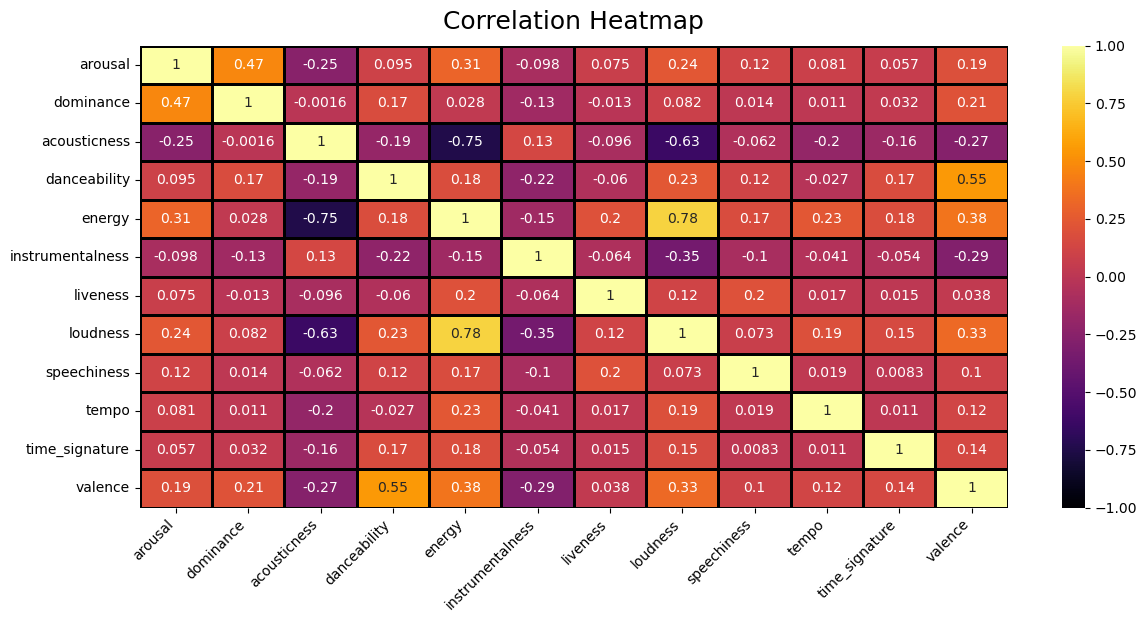

In [46]:
corr_df = tracks.corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot=True, vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black', cmap='inferno')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

In [97]:
#count of tracks per genre
Genra_counts = tracks['genre'].value_counts()

#percentage of genres with less than 100 tracks
print(f"{len(Genra_counts[Genra_counts<100])/len(Genra_counts):.2%}")

modified_tracks = tracks[~tracks['genre'].isin(Genra_counts[Genra_counts < 100].index)]



87.39%


In [98]:
modified_tracks.groupby('genre').count()['track_id'].sort_values(ascending=False)

genre
indie                 5600
rock                  4713
pop                   3661
electronic            3476
folk                  1979
                      ... 
spanish                108
meditation             106
dubstep                105
latin                  103
martial industrial     103
Name: track_id, Length: 87, dtype: int64

<AxesSubplot: xlabel='genre'>

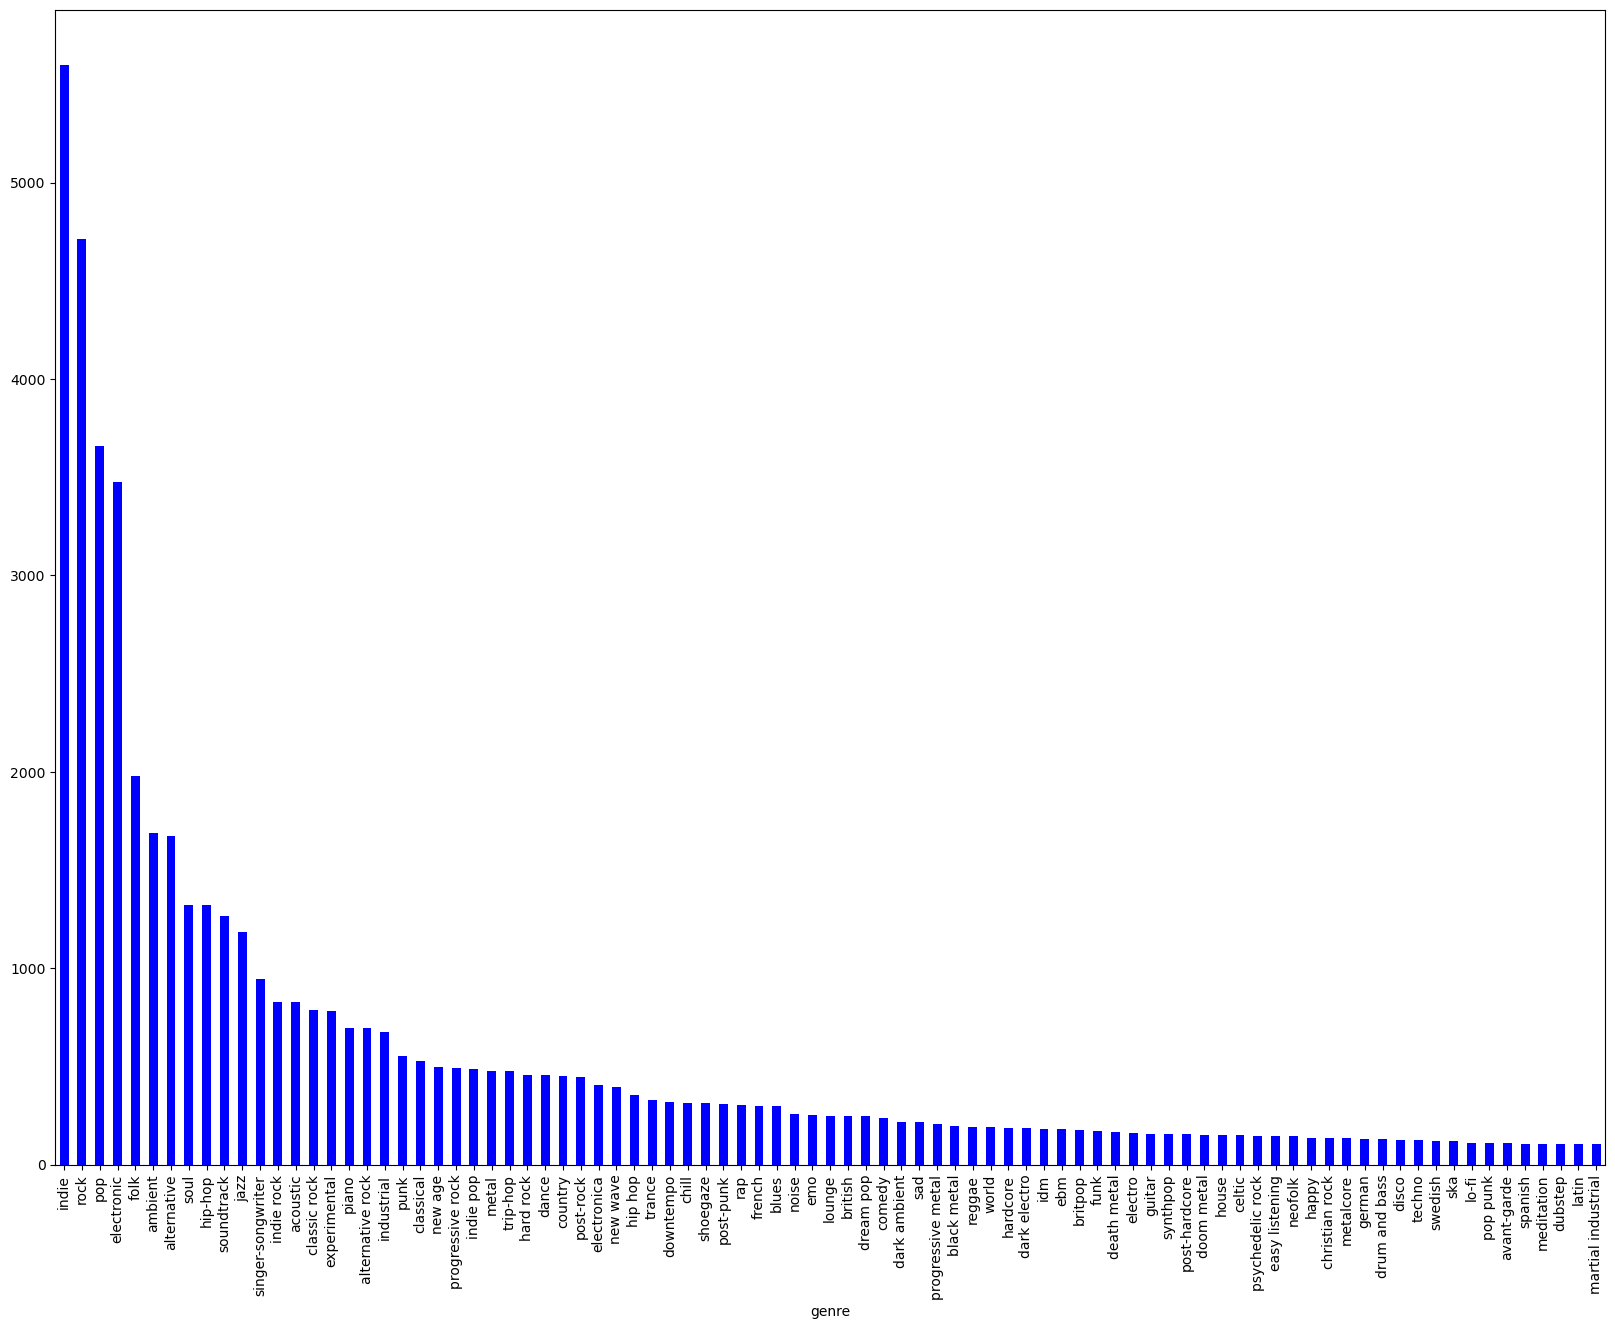

In [99]:
modified_tracks.groupby('genre').count()['track_id'].sort_values(ascending=False).plot(kind='bar', figsize=(20,15), color='blue')

In [100]:
modified_tracks.columns

Index(['track', 'artist', 'tags', 'arousal', 'dominance', 'track_id', 'genre',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
       'valence'],
      dtype='object')

In [ ]:
plt.title("")